In [14]:
# import warnings; warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

# import seaborn as sns
import matplotlib.pyplot as plt
# sns.set()

In [15]:
df = pd.read_csv("AllBirdsv4-csv.csv")
df.head()
df.shape

(2060, 9)

In [16]:
bird_df=df.loc[df.English_name=="Rose-crested Blue Pipit"]
bird_df.head()

,File ID,English_name,Label,Vocalization_type,Quality,Time,Date,X,Y
0,402254,Rose-crested Blue Pipit,1,call,0,13:30,2/8/2018,49,63
1,406171,Rose-crested Blue Pipit,1,call,A,7:48,6/7/2017,125,133
2,405901,Rose-crested Blue Pipit,1,call,A,12:00,2/8/2018,58,76
3,405548,Rose-crested Blue Pipit,1,song,A,11:00,3/10/2018,55,125
4,401782,Rose-crested Blue Pipit,1,song,A,6:00,6/29/2008,129,123


In [17]:
# bird_df.Vocalization_type = bird_df.Vocalization_type.replace({"song'":"song"," 'call":"call","song'":"song"})

In [18]:
# to plot locations of recordsings of Mitch based on Vocalization type and Quality

In [19]:
def bird_vt(vtype):
    x = bird_df.loc[bird_df.Vocalization_type == vtype]["X"], bird_df.loc[bird_df.Vocalization_type == vtype]["Y"]
    return x

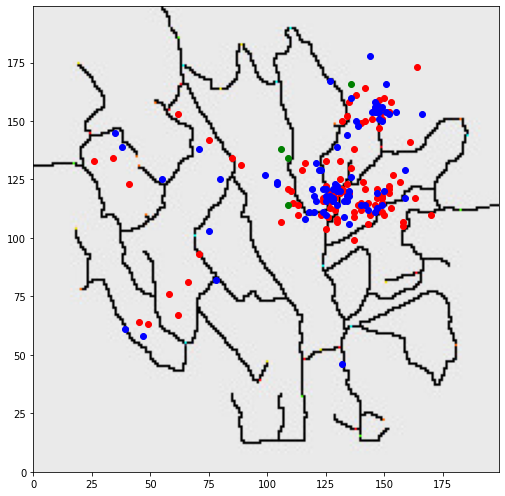

In [20]:
plt.rcParams["figure.figsize"] = [14.00, 7.0]
plt.rcParams["figure.autolayout"] = True
im = plt.imread('L1.jpeg')
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 199, 0, 199])
ax.plot(bird_vt("call")[0], bird_vt("call")[1],"o", color='red')
#ax.plot([bird_df.loc[bird_df.Vocalization_type == 'call'][0]],[ bird_df.loc[bird_df.Vocalization_type == 'call'][1]],"o", color='red')
ax.plot(bird_vt("song")[0], bird_vt("song")[1],"o", color='blue')
ax.plot(bird_vt("call, song")[0], bird_vt("call, song")[1],"o", color='green')
ax.plot(bird_vt("?")[0], bird_vt("?")[1],"o", color='black')
#ax.plot(bird_vt("call")[0], bird_vt("call")[1],"o", color='red')
plt.show()

In [17]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [22]:
import librosa
import librosa.display
from librosa import power_to_db
from librosa.feature import melspectrogram
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display as ipd
from tqdm import tqdm
from os import listdir
from librosa.effects import trim


/var/folders/hy/_2rw6v094hj35lqdzcwwkpbm0000gn/T/ipykernel_6754/3758696138.py:2: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  time_series, sample_rate = librosa.load("/Users/kamal/Downloads/Information Visualization/My Work/Kasios Wav/1.wav", 44100)
/var/folders/hy/_2rw6v094hj35lqdzcwwkpbm0000gn/T/ipykernel_6754/3758696138.py:7: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(time_series,sample_rate)


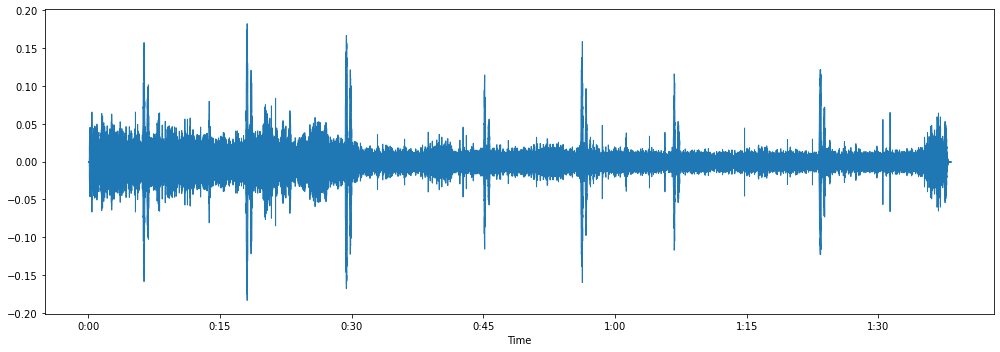

In [23]:



# from control import mag2db
time_series, sample_rate = librosa.load("/Users/kamal/Downloads/Information Visualization/My Work/Kasios Wav/1.wav", 44100)

plt.figure(figsize=(14, 5))
#librosa.display.waveplot(time_series,sample_rate,max_points=11025, x_axis='time', offset=0.0, marker='', where='post', label=None, ax=None)
#librosa.display.waveshow(x,sr, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)
librosa.display.waveshow(time_series,sample_rate)
# plt.colorbar(cmap=cm.jet,min=0.0,max=1.0)
plt.show()

  0%|                                                  | 0/2081 [00:00<?, ?it/s]

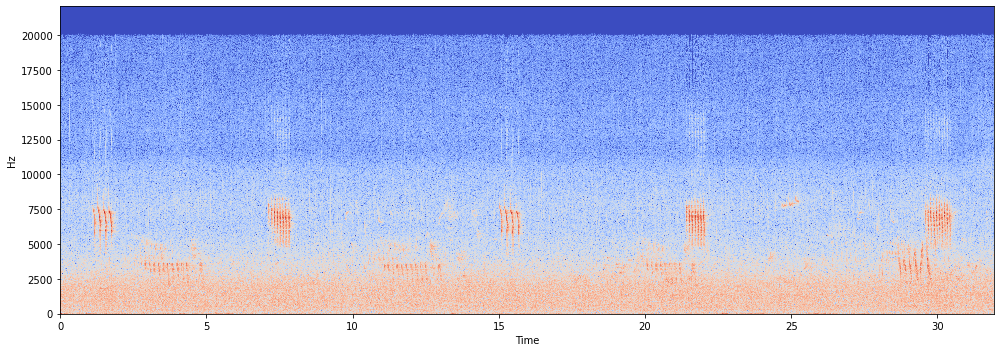

  0%|                                        | 1/2081 [00:02<1:15:43,  2.18s/it]

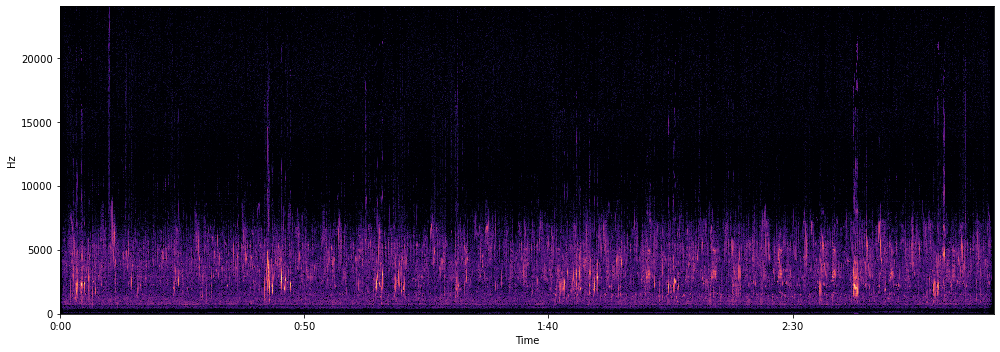

  0%|                                        | 2/2081 [00:18<5:55:30, 10.26s/it]

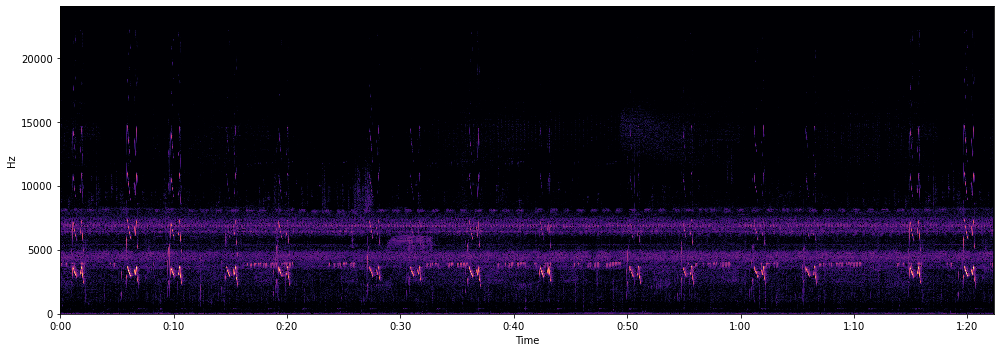

  0%|                                        | 3/2081 [00:24<4:38:56,  8.05s/it]


In [28]:

direc=r'/Users/kamal/Downloads/Information Visualization/My Work/WAV/'
k=0;
for i in tqdm(listdir(direc)):
    if k>2:
        break;
        
#     x, sr = librosa.load(files+i, sr=None)
#     X = librosa.stft(x)
#     Xdb = librosa.amplitude_to_db(abs(X))
#     plt.figure(figsize=(14, 5))
#     librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
#     plt.colorbar()
#     plt.show()
#     k+=1
    time_series_data, sampling_rate = librosa.load(direc+i, sr=None)
    freq_spec = librosa.stft(time_series_data)
    to_dB = librosa.amplitude_to_db(abs(freq_spec))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(to_dB, sr=sampling_rate,x_axis='time',y_axis='hz')
    plt.show()
    k+=1

In [166]:
pip install scikits.audiolab‑0.11.0‑cp27‑cp27m‑win32.whl

ERROR: scikits.audiolab‑0.11.0‑cp27‑cp27m‑win32.whl is not a valid wheel filename.
Note: you may need to restart the kernel to use updated packages.


In [35]:

from os import listdir
direc = r'/Users/kamal/Downloads/Information Visualization/My Work/WAV/'

Id, time_stamped_data, Sr, Bird_Name, Filename = [],[],[],[],[]
def get_ID(x):
    z=x.split("-")
    x=(z[-1].split("."))[0]
    return x
def get_name(x):
    z=x.split("-")
    z.pop()
    x=" ".join(z)
    return x



for x in listdir(direc):
    Id.append(get_ID(x))
    time_series_data, sample_rate = librosa.load(direc+x,sr=None)
    time_stamped_data.append(time_series_data)
    Sr.append(sample_rate)
    Bird_Name.append(get_name(x))
    Filename.append(direc+x)
        
    
    
data = pd.DataFrame({'ID':Id, 'Name':Bird_Name,'Sampling_rate':Sr, 'Value':time_stamped_data})

data.head()
#data.shape

,ID,Name,Sampling_rate,Value
0,315730,Queenscoat,44100,"[0.0004119873, 0.00015258789, -0.0024719238, -..."
1,164751,Broad winged Jojo,48000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,69888,Bent Beak Riffraff,48000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,14877,Rose Crested Blue Pipit,44100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,83517,Orange Pine Plover,44100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [36]:
# time_sample=[(i*1000) for i in list(data.Value[0])]
# time_sample=data.Value[0]
# zzz=[]
# for f in time_sample:
#     mmm=f*1000
#     zzz.append(mmm)

    
# print(zzz)
# # plt.boxplot(data)
 
# # # # show plot
# # plt.show()

In [37]:
rmse, chroma, spec = [], [], []
sr = 22050
def rms_feature(y):
    return np.mean(librosa.feature.rms(y=y))
def chrom(y,x):
    return np.mean(librosa.feature.chroma_stft(y=y, sr=x))
def centroid(y,x):
    return np.mean(librosa.feature.spectral_centroid(y=y, sr=x))
for i in tqdm(data.Value):
    rmse.append(rms_feature(i))
    chroma.append(chrom(i,sr))
    spec.append(centroid(i,sr))



  2%|▋                                      | 34/2081 [00:36<1:32:03,  2.70s/it]/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)
100%|███████████████████████████████████████| 2081/2081 [24:28<00:00,  1.42it/s]


In [38]:

data.ID = data.ID.astype(np.int64)

In [53]:
#print(len(data.ID))
data_training=pd.DataFrame({
    "ID":data.ID,"RMS_feature":rmse,"chrom_stft":chroma, "spectral_centroid":spec
})

#print(len(list(data_training.ID.unique())))
d1= data.merge(data_training, left_on = 'ID',right_on="ID")
# data=pd.merge(data,data_training,on="ID")
# print(data.shape)
d1.head(227)

,ID,Name,Sampling_rate,Value,RMS_feature,chrom_stft,spectral_centroid
0,315730,Queenscoat,44100,"[0.0004119873, 0.00015258789, -0.0024719238, -...",0.013532,0.582335,1786.110488
1,164751,Broad winged Jojo,48000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.010491,0.382651,2213.188551
2,69888,Bent Beak Riffraff,48000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.031244,0.310886,2642.334428
3,14877,Rose Crested Blue Pipit,44100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.056786,0.393534,3467.098221
4,83517,Orange Pine Plover,44100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.011038,0.312889,1967.989984
...,...,...,...,...,...,...,...
222,399993,Lesser Birchbeere,44100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.067489,0.574772,1082.959456
223,13505,Bent Beak Riffraff,44100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.041031,0.392571,2043.609038
224,391437,Orange Pine Plover,44100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.013707,0.533721,2015.017122
225,162080,Blue collared Zipper,44100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.012435,0.366647,3115.766903


In [54]:
x_label=[]
for i in d1.Name:
    if i=="Rose Crested Blue Pipit":
        x_label.append(1)
    else:
        x_label.append(0)
d1["Label"]=x_label
d1.head(2060)

,ID,Name,Sampling_rate,Value,RMS_feature,chrom_stft,spectral_centroid,Label
0,315730,Queenscoat,44100,"[0.0004119873, 0.00015258789, -0.0024719238, -...",0.013532,0.582335,1786.110488,0
1,164751,Broad winged Jojo,48000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.010491,0.382651,2213.188551,0
2,69888,Bent Beak Riffraff,48000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.031244,0.310886,2642.334428,0
3,14877,Rose Crested Blue Pipit,44100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.056786,0.393534,3467.098221,1
4,83517,Orange Pine Plover,44100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.011038,0.312889,1967.989984,0
...,...,...,...,...,...,...,...,...
2055,282864,Queenscoat,44100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.060406,0.641471,700.062052,0
2056,334189,Green Tipped Scarlet Pipit,44100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.015545,0.468734,3011.493129,0
2057,393737,Ordinary Snape,44100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.044278,0.350417,2908.622661,0
2058,362080,Ordinary Snape,48000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.019775,0.425667,4195.976666,0


In [55]:
d2=d1.drop(columns=['ID','Value','Sampling_rate'])
d2.head(2060)

,Name,RMS_feature,chrom_stft,spectral_centroid,Label
0,Queenscoat,0.013532,0.582335,1786.110488,0
1,Broad winged Jojo,0.010491,0.382651,2213.188551,0
2,Bent Beak Riffraff,0.031244,0.310886,2642.334428,0
3,Rose Crested Blue Pipit,0.056786,0.393534,3467.098221,1
4,Orange Pine Plover,0.011038,0.312889,1967.989984,0
...,...,...,...,...,...
2055,Queenscoat,0.060406,0.641471,700.062052,0
2056,Green Tipped Scarlet Pipit,0.015545,0.468734,3011.493129,0
2057,Ordinary Snape,0.044278,0.350417,2908.622661,0
2058,Ordinary Snape,0.019775,0.425667,4195.976666,0


In [56]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Random Forest Classifier

In [57]:
y_train = d2.Label.values
X_train = d2[['RMS_feature','chrom_stft','spectral_centroid']].values

RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train,y_train)
zz2=cross_val_score(RF,X_train,y_train,cv=4)
RF_SCORE = np.mean(zz2)*100
print (RF_SCORE)



90.53364461833752


In [ ]:
#KNN Classifier

In [58]:
#y.shape
# y.reshape(1,-1)
KNN = KNeighborsClassifier(n_neighbors=150)
KNN.fit(X_train, y_train) 
X=cross_val_score(KNN,X_train,y_train,cv=20)
y_pred = KNN.predict(X_train)
KNN_SCORE = np.mean(X)*100
print (KNN_SCORE)


91.06227106227107


In [ ]:
#Decision Tree Classifier

In [59]:
DT = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0)
DT.fit(X_train, y_train) 
Z=cross_val_score(DT,X_train,y_train,cv=20)
y_pred2 = DT.predict(X_train)
DT_SCORE = np.mean(Z*100)
print (DT_SCORE)

85.44047619047619


In [ ]:
#Gaussian Naive Bayes Classifier

In [60]:
GNB = GaussianNB(priors=None, var_smoothing=1e-09)
GNB.fit(X_train, y_train) 
Z1=cross_val_score(GNB,X_train,y_train,cv=20)
y_pred3 = GNB.predict(X_train)
GNB_SCORE = np.mean(Z1*100)
print(GNB_SCORE)

90.86996336996339


In [ ]:
#Finding RMSE, CHROMA_STFT, SPEC_CENT_TEST values for Kisios  data

In [61]:
files=r'/Users/kamal/Downloads/Information Visualization/My Work/Kasios Wav/'
rmse_test, chroma_stft_test, spec_cent_test = [], [], []


x = 22050

def rms_feature(y):
    return np.mean(librosa.feature.rms(y=y))
def chrom(y,x):
    return np.mean(librosa.feature.chroma_stft(y=y, sr=x))
def centroid(y,x):
    return np.mean(librosa.feature.spectral_centroid(y=y, sr=x))
for i in listdir(files):
    m, n = librosa.load(files+i)
    rmse_test.append(rms_feature(m))
    chroma_stft_test.append(chrom(m,x))
    spec_cent_test.append(centroid(m,x))
print(rmse_test)
    
#data_test=pd.DataFrame({'RMSE':rmse_test,'chroma_test':chroma_stft_test,'spec_cent':spec_cent})
data_test=pd.DataFrame({
    "rmse_test":rmse_test,"chroma_stft_test":chroma_stft_test, "spec_cent_test":spec_cent_test
})
data_test.head()




[0.016456965, 0.010878092, 0.01692049, 0.043610893, 0.006787981, 0.01729824, 0.007986751, 0.0054721916, 0.010341535, 0.05058721, 0.013212586, 0.00808346, 0.008755376, 0.005359719, 0.018012108]


,rmse_test,chroma_stft_test,spec_cent_test
0,0.016457,0.352669,4312.288683
1,0.010878,0.516200,3619.013006
2,0.016920,0.472421,2477.799091
3,0.043611,0.271650,5250.898477
4,0.006788,0.583405,4870.716071


In [ ]:
#Plotting Bar chart to show accuracies

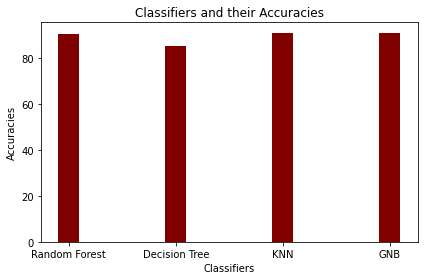

In [67]:
plt.bar(['Random Forest','Decision Tree','KNN', 'GNB'],[RF_SCORE,DT_SCORE,KNN_SCORE,GNB_SCORE],color ='maroon',
        width = 0.2)
plt.xlabel("Classifiers")
plt.ylabel("Accuracies")
plt.title("Classifiers and their Accuracies")
plt.show()

In [ ]:
#Predictions based multiple Classifiers

In [62]:
y_test=RF.predict(data_test)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [63]:
y_test2=KNN.predict(data_test)
print(y_test2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [64]:
y_test3=DT.predict(data_test)
print(y_test3)

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [65]:
y_test4=GNB.predict(data_test)
print(y_test4)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
